In [1]:
# General Libs
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, BatchNormalization, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.models import load_model
from tensorflow.keras.optimizers import Adam
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import os

def walk_on_dir(dir):
    print(dir)
    i = 0 
    for path, dirs, files in os.walk(dir):
        if len(dirs) > 0:
            print(len(dirs))
            print(dirs)
            _dirs = dirs
        else:
            print(path)
            print(_dirs[i])
            print(files)
            i+=1
    print(i)

In [3]:
MAX_EPOCHS = 30
PATIENCE = 2

def train_model(model_id, model, train_generator, val_generator):


    cb_save_best_model = keras.callbacks.ModelCheckpoint(filepath=model_id,
                                                         monitor='val_loss', 
                                                         save_best_only=True, 
                                                         verbose=1)


    cb_early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', 
                                                  patience= PATIENCE,
                                                  verbose=1)


    history = model.fit(
            train_generator,
            steps_per_epoch = train_generator.samples // BATCH_SIZE,
            epochs=MAX_EPOCHS,
            callbacks = [cb_save_best_model, cb_early_stop],
            validation_data=val_generator,
            verbose = 1,
            validation_steps= val_generator.samples // BATCH_SIZE)
    
    return history

In [4]:
def print_metrics(model, dataset_generator):
    score = model.evaluate(test_generator)
    print('Test loss:', score[0])
    print('Test accuracy:', score[1])
    print('Test ROC AUC:', score[2])

In [5]:
def plot_training_curves(history):
    # Training curves
    import matplotlib.pyplot as plt

    history_dict = history.history
    loss_values = history_dict['loss']
    val_loss_values = history_dict['val_loss']

    epochs_x = range(1, len(loss_values) + 1)
    plt.figure(figsize=(10,10))
    plt.subplot(2,1,1)
    plt.plot(epochs_x, loss_values, 'bo', label='Training loss')
    plt.plot(epochs_x, val_loss_values, 'b', label='Validation loss')
    plt.title('Training and validation Loss and Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.subplot(2,1,2)
    acc_values = history_dict['accuracy']
    val_acc_values = history_dict['val_accuracy']
    plt.plot(epochs_x, acc_values, 'bo', label='Training acc')
    plt.plot(epochs_x, val_acc_values, 'b', label='Validation acc')
    #plt.title('Training and validation accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Acc')
    plt.legend()
    plt.show()

In [6]:
import itertools

#Plot the confusion matrix. Set Normalize = True/False
def plot_confusion_matrix(cm, classes, normalize=True, title='Confusion matrix', cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.figure(figsize=(15,15))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        cm = np.around(cm, decimals=2)
        cm[np.isnan(cm)] = 0.0
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [7]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

def plot_confusion_matrix_and_classification_report(model, dataset_generator, classes):
    Y_pred = model.predict(dataset_generator)
    y_pred = np.argmax(Y_pred, axis=1)
    
    #Confution Matrix
    cm = confusion_matrix(test_generator.classes, y_pred)
    plot_confusion_matrix(cm, classes, normalize=False, title='Confusion Matrix')

    #Classification Report
    print('Classification Report')
    print(classification_report(test_generator.classes, y_pred, target_names=classes))

In [8]:
IMG_SHAPE = (244,244)
INPUT_SHAPE = (IMG_SHAPE[0], IMG_SHAPE[1], 3)

TRAIN_DIR = 'C:/Users/AGM/UDSculptureDataSet/Data/Train/Train'
TEST_DIR = 'C:/Users/AGM/UDSculptureDataSet/Data/Test/Test'
VAL_DIR = 'C:/Users/AGM/UDSculptureDataSet/Data/Validation/Validation'

In [9]:
classes = os.listdir(TRAIN_DIR)
num_classes = len(classes)
num_classes

24

In [10]:
BATCH_SIZE = 64

RANDOM_SEED = 33

MAX_CLASSES = num_classes

In [11]:
import random

random.Random(RANDOM_SEED).shuffle(classes)

classes = classes[:MAX_CLASSES]
num_classes = len(classes)

classes

['JANE AUSTEN',
 'HONOR ROLL',
 'DANTE',
 'KAPPA ALPHA PSI',
 'CHRIST THE TEACHER',
 'MARY OF CANA',
 'HAIL MARY',
 'MOSES MAIMONIDES',
 'WILLIAM JOSEPH CHAMINADE',
 'MARY SEAT OF WISDOM',
 'OMEGA POINT',
 'WOLFGANG AMADEUS MOZART',
 'THRONE BY BROTHER MEL',
 'MARTIN LUTHER KING JR',
 'MARY LOUISA',
 'WILLIAM SHAKESPEARE',
 'SERENITY PINES',
 'THE HOLY FAMILY',
 'RED CUBE',
 'LADY OF THE PINES',
 'KNIGHT BY BROTHER MEL',
 'TRUSTING IN DREAMS',
 'JOHN F KENNEDY',
 'THOMAS EQUINAS']

Found 240 images belonging to 24 classes.


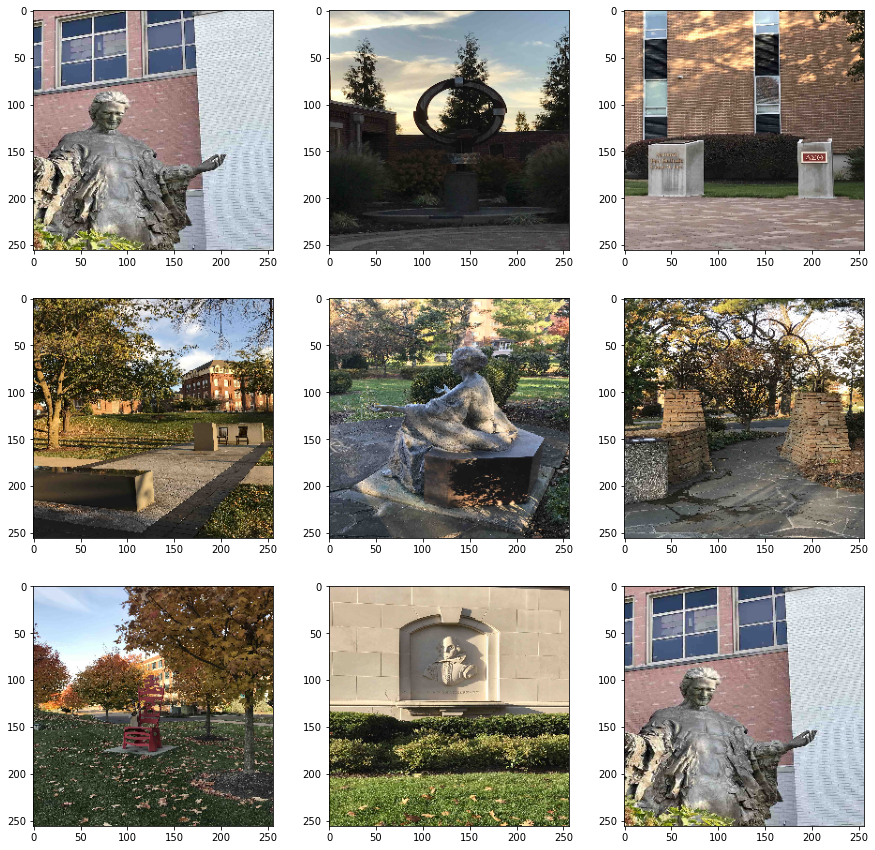

In [12]:
# Visualizing some sample data

sample_generator = ImageDataGenerator().flow_from_directory(TEST_DIR, shuffle=False)

plt.figure(figsize=(15,15))
for i in range(9):
    # 3x3 grid
    plt.subplot(330 + 1 + i)
    batch = sample_generator.next()[0]
    image = batch[0].astype('uint8')
    plt.imshow(image)
plt.show()

In [13]:
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input

In [14]:
generator_args = {
    "preprocessing_function":preprocess_input,
}
flow_args = {
    "target_size":IMG_SHAPE,
    "seed":RANDOM_SEED,
    "batch_size":BATCH_SIZE,
    "class_mode":"categorical",
    "classes":classes,
}

In [15]:
img_generator = ImageDataGenerator(**generator_args)
augmented_img_generator = ImageDataGenerator(rotation_range=20,
                                             width_shift_range=0.1,
                                             height_shift_range=0.1,
                                             shear_range=0.1,
                                             zoom_range=0.1,
                                             horizontal_flip=True,
                                             fill_mode='nearest',
                                             **generator_args)

In [16]:
train_generator = augmented_img_generator.flow_from_directory(TRAIN_DIR, shuffle=True, **flow_args)
test_generator = img_generator.flow_from_directory(TEST_DIR, shuffle=False, **flow_args)
val_generator = img_generator.flow_from_directory(VAL_DIR, shuffle=False, **flow_args)

Found 4205 images belonging to 24 classes.
Found 240 images belonging to 24 classes.
Found 955 images belonging to 24 classes.


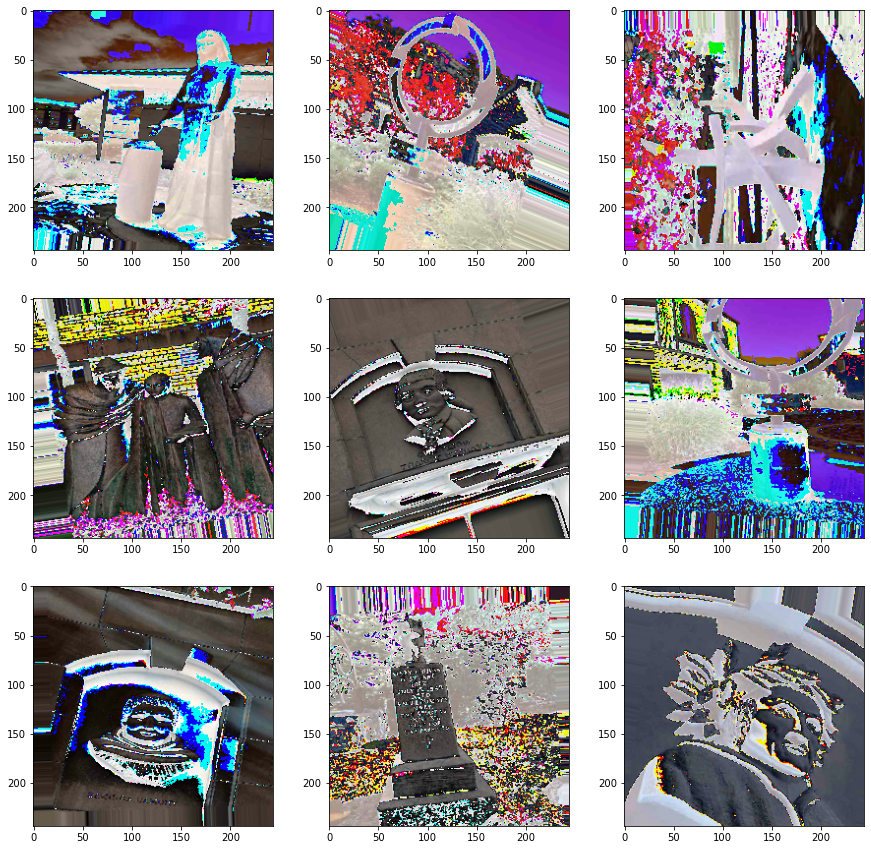

In [17]:
# Visualizing some pre-processed examples

plt.figure(figsize=(15,15))
for i in range(9):
    # 3x3 grid
    plt.subplot(330 + 1 + i)
    batch = train_generator.next()[0]
    image = batch[0].astype('uint8')
    plt.imshow(image)
plt.show()


In [18]:
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=INPUT_SHAPE)

x = base_model.output
x = Flatten()(x)
x = Dense(120, activation='sigmoid')(x)
x = Dropout(0.1)(x)

predictions = Dense(num_classes, activation='softmax', kernel_initializer='random_uniform')(x)

model = Model(inputs=base_model.input, 
              outputs=predictions)
model.summary()

# Freezing pretrained layers
for layer in base_model.layers:
    layer.trainable=False
    
model.compile(optimizer=Adam(),
              loss='categorical_crossentropy',
              metrics=['accuracy', "AUC"])

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 244, 244, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 250, 250, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 122, 122, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 122, 122, 64) 256         conv1_conv[0][0]                 
______________________________________________________________________________________________

In [19]:
MODEL_ID = 'resnet50.model.akg.h5'

history = train_model(MODEL_ID, model, train_generator, val_generator)

Epoch 1/30
65/65 [==============================] - 560s 9s/step - loss: 2.1704 - accuracy: 0.6028 - auc: 0.9325 - val_loss: 1.6542 - val_accuracy: 0.7891 - val_auc: 0.9836

Epoch 00001: val_loss improved from inf to 1.65422, saving model to resnet50.model.akg.h5


C:\Users\AGM\anaconda3\envs\tfp3.8\lib\site-packages\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


Epoch 2/30
65/65 [==============================] - 558s 9s/step - loss: 1.1585 - accuracy: 0.9119 - auc: 0.9963 - val_loss: 0.9891 - val_accuracy: 0.8627 - val_auc: 0.9940

Epoch 00002: val_loss improved from 1.65422 to 0.98908, saving model to resnet50.model.akg.h5
Epoch 3/30
65/65 [==============================] - 528s 8s/step - loss: 0.6519 - accuracy: 0.9548 - auc: 0.9989 - val_loss: 0.5870 - val_accuracy: 0.9408 - val_auc: 0.9987

Epoch 00003: val_loss improved from 0.98908 to 0.58695, saving model to resnet50.model.akg.h5
Epoch 4/30
65/65 [==============================] - 561s 9s/step - loss: 0.4002 - accuracy: 0.9717 - auc: 0.9996 - val_loss: 0.4130 - val_accuracy: 0.9498 - val_auc: 0.9986

Epoch 00004: val_loss improved from 0.58695 to 0.41302, saving model to resnet50.model.akg.h5
Epoch 5/30
65/65 [==============================] - 573s 9s/step - loss: 0.2692 - accuracy: 0.9802 - auc: 0.9998 - val_loss: 0.3506 - val_accuracy: 0.9520 - val_auc: 0.9987

Epoch 00005: val_loss 

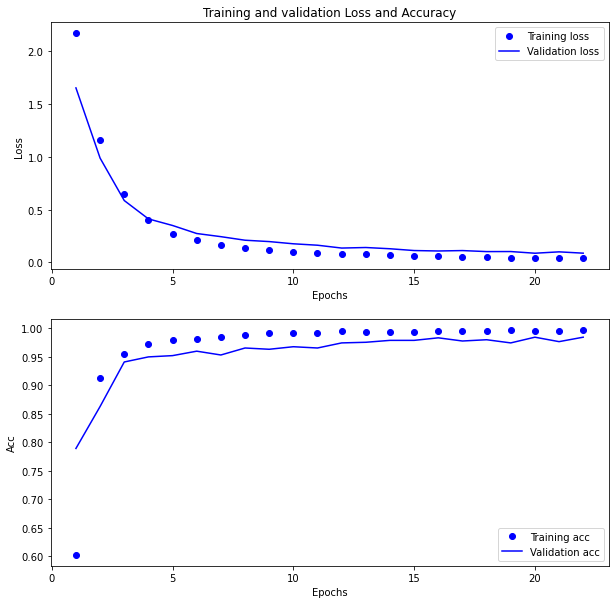

In [20]:
plot_training_curves(history)

In [21]:
print_metrics(model, test_generator)

4/4 [==============================] - 33s 8s/step - loss: 0.2674 - accuracy: 0.9417 - auc: 0.9982
Test loss: 0.26743724942207336
Test accuracy: 0.9416666626930237
Test ROC AUC: 0.998157799243927


Classification Report
                          precision    recall  f1-score   support

             JANE AUSTEN       0.91      1.00      0.95        10
              HONOR ROLL       1.00      1.00      1.00        10
                   DANTE       0.83      1.00      0.91        10
         KAPPA ALPHA PSI       0.71      1.00      0.83        10
      CHRIST THE TEACHER       1.00      1.00      1.00        10
            MARY OF CANA       1.00      1.00      1.00        10
               HAIL MARY       1.00      1.00      1.00        10
        MOSES MAIMONIDES       1.00      0.50      0.67        10
WILLIAM JOSEPH CHAMINADE       1.00      1.00      1.00        10
     MARY SEAT OF WISDOM       1.00      1.00      1.00        10
             OMEGA POINT       0.91      1.00      0.95        10
 WOLFGANG AMADEUS MOZART       1.00      0.80      0.89        10
   THRONE BY BROTHER MEL       1.00      1.00      1.00        10
   MARTIN LUTHER KING JR       1.00      0.80      0.

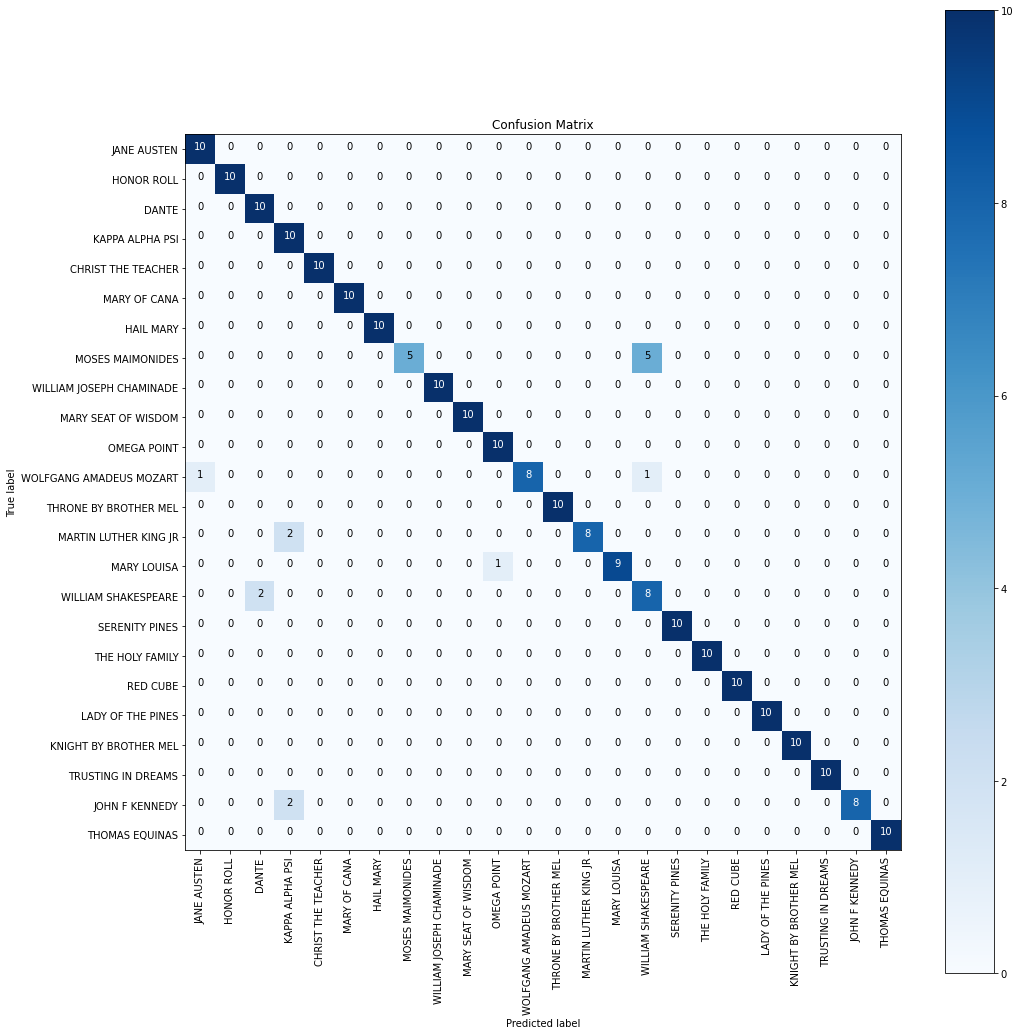

In [22]:
plot_confusion_matrix_and_classification_report(model, test_generator, classes)